In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error
RANDOM_STATE = 2

## Разведывательный анализ данных

In [98]:
# загружаем данные
data = pd.read_csv('data/data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [99]:
# переводим названяи столбцов в нижний регистр и меняем пробелы на _
data.columns = data.columns.str.lower().str.replace(' ', '_')

# собираем список строковых столбцов
string_col = list(data.dtypes[data.dtypes == 'object'].index)

# в столбцах понижаем регистр, меняем пробелы на _
for col in string_col:
    data[col] = data[col].str.lower().str.replace(' ', '_')

data.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [101]:
data.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Анализ целевой переменной

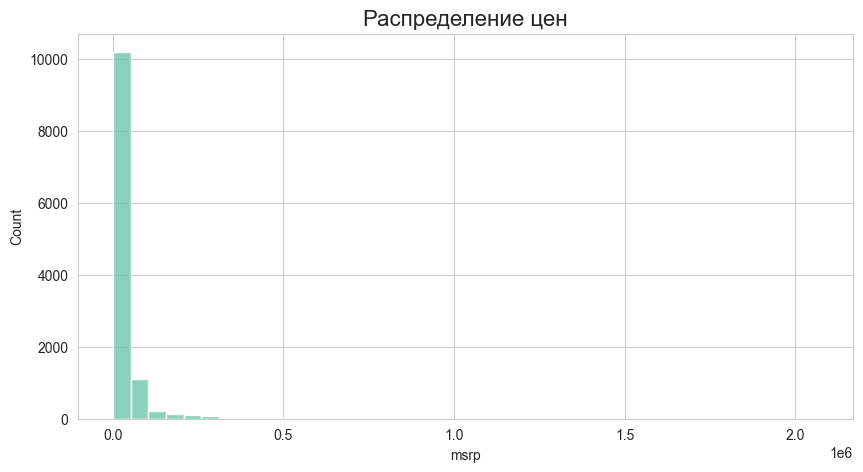

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data['msrp'], bins=40)
ax.set_title('Распределение цен',fontsize=16)
plt.show()

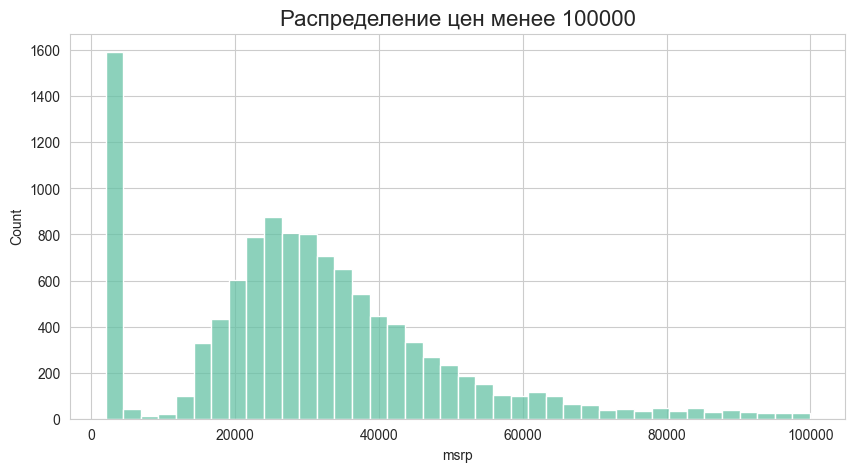

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data['msrp'][data['msrp'] < 100000], bins=40)
ax.set_title('Распределение цен менее 100000',fontsize=16)
plt.show()

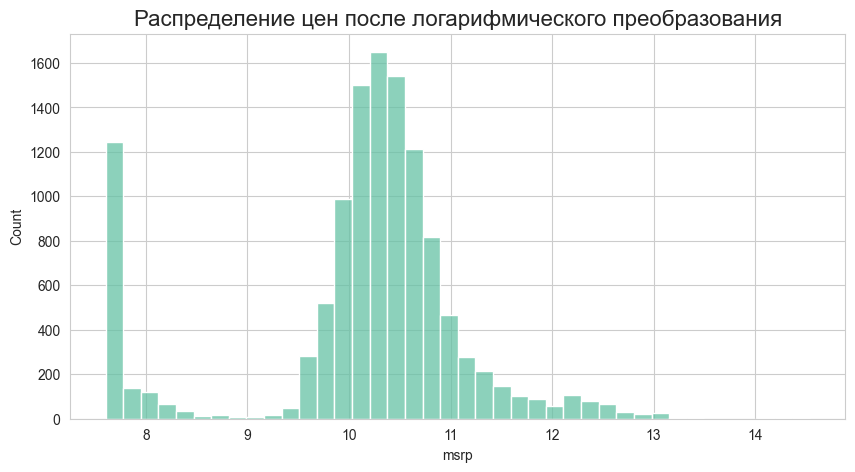

In [104]:
log_prise = np.log1p(data['msrp'])
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(log_prise, bins=40)
ax.set_title('Распределение цен после логарифмического преобразования',fontsize=16)
plt.show()

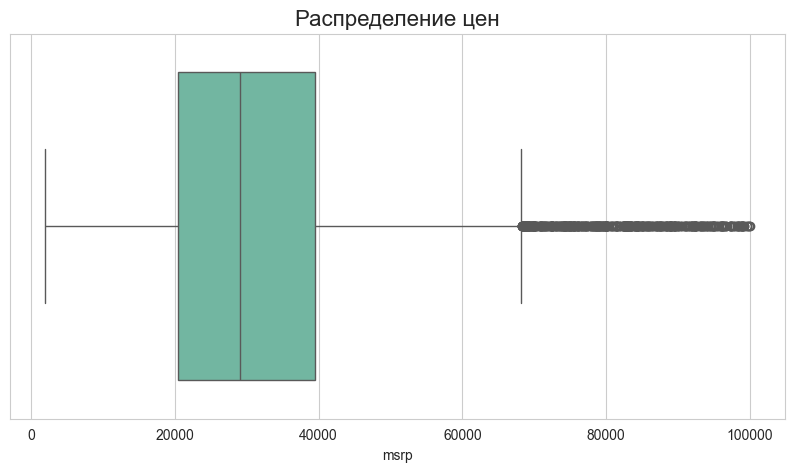

In [105]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data['msrp'][data['msrp'] < 100000], orient='h')
ax.set_title('Распределение цен',fontsize=16)
plt.show()

Целевая переменная не распрелелена нормально, возможно оправдано применение логарифмической функции, работа с выбрсоами

### Анализ признаков

#### Проверка на дубликаты

In [106]:
print(f"Всего дубликатов: {data.duplicated().sum()}\n{data.shape}")

Всего дубликатов: 715
(11914, 16)


Есть дубликаты, возможно придется избавитсья

#### Анализ пропусков 

In [107]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

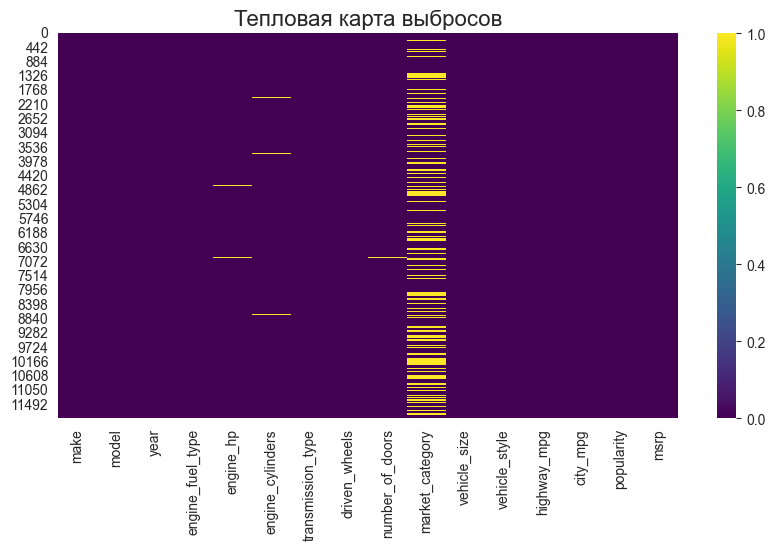

In [108]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(data.isna(), cmap='viridis')
ax.set_title('Тепловая карта выбросов',fontsize=16)
plt.show()

In [109]:
data[data['number_of_doors'].isna()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4666,ferrari,ff,2013,premium_unleaded_(required),651.0,12.0,automated_manual,all_wheel_drive,NaN,"exotic,high-performance",large,coupe,16,11,2774,295000
6930,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,105,102,1391,79500
6931,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,101,98,1391,66000
6932,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,high-performance",large,sedan,105,92,1391,134500
6933,tesla,model_s,2016,electric,NaN,0.0,direct_drive,rear_wheel_drive,NaN,"exotic,performance",large,sedan,100,97,1391,74500
6934,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,107,101,1391,71000


Присутсвтуют пропуски в поризнаках market_category, engine_fuel_type, engine_hp, engine_cylinders:

Возможно улучшение качества модели, если:
* engine_fuel_type заполянем 'regular_unleaded'
* engine_hp заполняем средним
* engine_cylinders электрическим машинам заполняем как 0.0, остальным по моде
* market_category можно разделить на нескольк опризнаков, пропуски заполнить 0
* number_of_doors coupe заполянем 2.0, sedan заполдняем 4.0

### Подготовка данных

In [110]:
# разбиваем данные на тренировочные и тестовые
data_train_full, data_test = train_test_split(data, test_size=0.1, random_state=RANDOM_STATE)

# Разбиваем тренировочные данные на тренировочные и валидационные
data_train, data_val = train_test_split(data_train_full, test_size=0.25, random_state=RANDOM_STATE)

# запишем целевую переменную
y_val = np.log1p(data_val['msrp'])
y_test = np.log1p(data_test['msrp'])
y_train = np.log1p(data_train['msrp'])

# удалим целевую переменную из обучающих наборов
del data_val['msrp']
del data_test['msrp']
del data_train['msrp']

## Линейная регрессия 

In [111]:
# в качестве примера вручную напишем функцию линеной регрессии c регуляризацией
# далее будем использовать моель из бибблиотеки sklearn
'''def train_linear_regression(X, y, r=0.0):
    # добавляем фиктивный столбец
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # формула нормлаьного уравнения с регуляризацией
    XTX = X.T.dot(X)
    #добавляем к основной диагонали r
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]'''

'def train_linear_regression(X, y, r=0.0):\n    # добавляем фиктивный столбец\n    ones = np.ones(X.shape[0])\n    X = np.column_stack([ones, X])\n\n    # формула нормлаьного уравнения с регуляризацией\n    XTX = X.T.dot(X)\n    #добавляем к основной диагонали r\n    reg = r * np.eye(XTX.shape[0])\n    XTX = XTX + reg\n\n    XTX_inv = np.linalg.inv(XTX)\n    w = XTX_inv.dot(X.T).dot(y)\n\n    return w[0], w[1:]'

### Базовое решение 

In [112]:
# выберем признаки на основе которых будем предсказывать цену
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

# функция создания матрицы X из датафрейма и преобразования признаков
def prepare_x(df):
    df = df.copy()
    features = base.copy()

    # создадим признак возраста автомобиля(2017 - год создания датасета)
    df['age'] = 2017 - df.year
    features.append('age')

    # кодируем признак кол-ва дверей
    for n in [2, 3, 4]:
        feature = 'number_of_doors%s' % n
        df[feature] = (df['number_of_doors'] == n).astype(int)
        features.append(feature)

    # кодируем признак марки автомобиля
    for m in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % m
        df[feature] = (df['make'] == m).astype(int)
        features.append(feature)

    # кодируем признак типа двигателя
    for t in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']:
        feature = 'is_type_%s' % t
        df[feature] = (df['engine_fuel_type'] == t).astype(int)
        features.append(feature)

    # кодируем признак типа трансмиссии
    for tt in ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']:
        feature = 'transmission_type_is_%s' % tt
        df[feature] = (df['transmission_type'] == tt).astype(int)
        features.append(feature)

    # кодируем признак кол-ва ведущих колес
    for dw in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % dw
        df[feature] = (df['driven_wheels'] == dw).astype(int)
        features.append(feature)

    # кодируем признак категории маркетинга
    for mc in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_market_category_%s' % mc
        df[feature] = (df['market_category'] == mc).astype(int)
        features.append(feature)

    # кодируем признак размера
    for s in ['compact', 'midsize', 'large']:
        feature = 'is_vehicle_size_%s' % s
        df[feature] = (df['vehicle_size'] == s).astype(int)
        features.append(feature)

    # кодируем стиль
    for st in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_vehicle_style_%s' % st
        df[feature] = (df['vehicle_style'] == st).astype(int)
        features.append(feature)

    df_num = df[features]
    # избавимся от пропусков - заполним пропуски нулями(либо как было сказано на этапе разведочного анализа)
    df_num = df_num.fillna(0)
    #X = df_num.values # преобразовываем датафрейм в NumPy массив
    return df_num

### Обучение и оценка качества модели

In [113]:
# преобразуем датасет
X_train = prepare_x(data_train)

# обучаем модель
model = Ridge(alpha=0.001)
model.fit(X_train, y_train)

Ridge(alpha=0.001)

In [114]:
# предсказываем
X_val = prepare_x(data_val)
y_pred = model.predict(X_val)

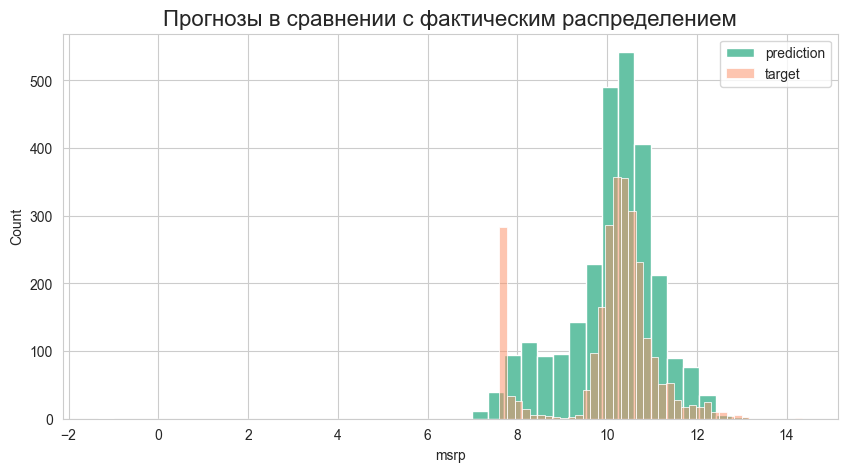

In [115]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(y_pred, bins=40, label='prediction', alpha=1)
sns.histplot(y_val, bins=40, label='target', alpha=0.5)
ax.set_title('Прогнозы в сравнении с фактическим распределением',fontsize=16)
plt.legend()
plt.show()

In [116]:
y_val = np.expm1(y_val.values)
y_pred = np.expm1(y_pred)

print(f'MAPE: {round(mean_absolute_percentage_error(y_val, y_pred)*100)}%')

MAPE: 37%


In [117]:
# Оценка каечства на тестовых данных
X_test = prepare_x(data_test)

# предсказываем цену
y_pred = model.predict(X_test)

# проверяем качество
y_test = np.expm1(y_test.values)
y_pred = np.expm1(y_pred)

print(f'MAPE: {round(mean_absolute_percentage_error(y_test, y_pred)*100)}%')

MAPE: 36%


Данная модель ошибается в среднем на 36%, требуется доработка.

### Использование модели

In [118]:
ad = {'make': 'toyota',
    'model': 'venza',
    'year': 2013,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'engine_cylinders': 6.0,
    'transmission_type': 'automatic',
    'driven_wheels': 'all_wheel_drive',
    'number_of_doors': 4.0 ,
    'market_category': 'crossover,performance',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'highway_mpg': 25,
    'city_mpg': 18,
    'popularity': 2031
}

In [119]:
# прееводим словарь в датафрейм и преобразовываем
df_test = pd.DataFrame([ad])
X_test = prepare_x(df_test)

# предсказываем
y_pred = model.predict(X_test)

# берем экспоненту
np.expm1(y_pred)

array([28025.62900996])

Фактическая цена согласно источнику была 31120 долларов, наша модель неплохо спарвилась с конкретно этой задачей